# 豆瓣数据爬虫

In [25]:
import requests
import time
import random
from bs4 import BeautifulSoup


In [26]:
# 通过观察的url翻页的规律，使用for循环得到10个链接，保存到urls列表中
# urls = ['https://movie.douban.com/subject/34841067/comments?start={}&limit=20&status=P&sort=new_score'.format(str(i)) for i in range(0, 200, 20)]

# 先使用单条url测试
urls = "https://movie.douban.com/subject/34841067/comments?start=1&limit=20&status=P&sort=new_score"


爬虫发起get请求，对于有些网站，会拒绝掉没有携带header的请求的，所以需要做一些header增强，即提供User-Agent，Cookie，host等信息
我们得到的是一个Response对象，可以使用.text或者.content属性来获取
1.  text：是以字符串的形式返回数据
2.  content：是以二进制的方式返回数据

In [27]:
# 请求头
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.212 Safari/537.36"
}
# 发送请求，.text返回的是字符串
r = requests.get(url=urls, headers=headers).text


Beautifulres解析HTML网页，传入的参数r：字符串（即网页源码），'html.parser'：指定解析器，解析html文件

In [28]:
# 使用BeautifulSoup解析HTML网页
res = BeautifulSoup(r, 'html.parser')


1.  res.title  获取文档的title
2.  res.title.string  获取title的内容
3.  res.p  获取文档中第一个p标签节点
4.  res.find_all('p', class_="comment-content") 获取所有class="comment-content"的p标签，返回list，包含了很多p标签

In [29]:
# 定位到评论的标签
p_list=res.find_all('span',class_="short")

In [30]:
# 存放评论的列表
comments_list = []


In [31]:
for p in p_list:
    # 评论内容
    comment = p.text.strip()
    # print(comment)
    # 保存到列表中
    comments_list.append(comment)


In [32]:
# 将comments_list列表中的评论写入到文件中
with open('comment.txt', 'w', encoding='utf-8') as f:
    for comment in comments_list:
        f.write(comment + '\n')


In [24]:
# To do: 使用上面的第一条url列表，将10个网页的评论都爬取下来，保存到sumComment.txt文件中
urls = ['https://movie.douban.com/subject/34841067/comments?start={}&limit=20&status=P&sort=new_score'.format(str(i)) for i in range(0, 200, 20)]
# 请求头
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.212 Safari/537.36"
}
for url in urls:
    # 发送请求，.text返回的是字符串
    r = requests.get(url=url, headers=headers).text
    res = BeautifulSoup(r, 'html.parser')
    p_list=res.find_all('span',class_="short")
    comments_list = []
    for p in p_list:
        # 评论内容
        comment = p.text.strip()
        # 保存到列表中
        comments_list.append(comment)

    with open('sumcomment.txt', 'a', encoding='utf-8') as f:
        for comment in comments_list:
            f.write(comment + '\n')

In [35]:
# To do: 爬取豆瓣电影评论区每个用户的名字，并存入到name.txt文件中
# To do: 使用上面的第一条url列表，将10个网页的评论都爬取下来，保存到sumComment.txt文件中
urls = ['https://movie.douban.com/subject/34841067/comments?start={}&limit=20&status=P&sort=new_score'.format(str(i)) for i in range(0, 200, 20)]
# 请求头
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.212 Safari/537.36"
}
for url in urls:
    # 发送请求，.text返回的是字符串
    r = requests.get(url=url, headers=headers).text
    res = BeautifulSoup(r, 'html.parser')
    p_list=res.find_all('span',class_="comment-info")
    names_list = []
    for p in p_list:
        # 评论内容
        name = p.find('a').text.strip()
        # 保存到列表中
        names_list.append(name)

    with open('name.txt', 'a', encoding='utf-8') as f:
        for name in names_list:
            f.write(name + '\n')

# 高德地图POI数据爬取

## 高德地图POI数据爬取练习

### 1、根据教程和高德API接口教程，自行爬取深圳技术大学10000米以内的餐饮服务类地区。（餐饮服务的types为050000）

In [37]:
import requests
import math
import json
import pandas as pd


In [45]:
# your code
import requests
import math
import json
import pandas as pd

# 配置核心参数
key = '6b76bf383261a5635bf0d6d57afbc450'  # 你的专属Key
keywords = ''  # 周边搜索可不填关键字，仅按类型筛选
types = '050000'  # 餐饮服务类型编码
location = '114.398807,22.700705'  # 深圳技术大学大致经纬度（可根据实际坐标调整）
radius = 10000  # 搜索半径10000米
offset = 20  # 每页最大返回20条数据（高德API限制）
page = 1  # 初始页码

# 构造周边搜索API的基础URL
base_url = 'https://restapi.amap.com/v3/place/around'

# 定义函数：获取单页数据
def get_one_page(page_num):
    params = {
        'key': key,
        'keywords': keywords,
        'types': types,
        'location': location,
        'radius': radius,
        'offset': offset,
        'page': page_num,
        'output': 'json'
    }
    try:
        response = requests.get(base_url, params=params)
        if response.status_code == 200:
            return json.loads(response.text)
        else:
            print(f"请求失败，状态码：{response.status_code}")
            return None
    except Exception as e:
        print(f"请求异常：{e}")
        return None

# 定义函数：获取所有页数据
def get_all_pages():
    all_pois = []
    # 先获取第一页数据，确定总页数
    first_page_data = get_one_page(page)
    if not first_page_data or first_page_data['status'] != '1':
        print("获取第一页数据失败")
        return all_pois
    
    total_count = int(first_page_data['count'])
    print(f"共找到 {total_count} 条餐饮服务POI数据")
    
    # 计算总页数（向上取整）
    total_pages = math.ceil(total_count / offset)
    print(f"共需爬取 {total_pages} 页")
    
    # 添加第一页数据
    all_pois.extend(first_page_data['pois'])
    
    # 循环爬取剩余页面
    for page_num in range(2, total_pages + 1):
        page_data = get_one_page(page_num)
        if page_data and page_data['status'] == '1':
            all_pois.extend(page_data['pois'])
            print(f"已爬取第 {page_num} 页，累计数据 {len(all_pois)} 条")
        else:
            print(f"第 {page_num} 页爬取失败，跳过")
    
    return all_pois

# 执行爬取
pois_data = get_all_pages()

# 转换为DataFrame并保存
if pois_data:
    df = pd.DataFrame(pois_data)
    df.to_csv('sztu_catering_poi.csv', index=False, encoding='utf-8-sig')
    print("数据已保存到 sztu_catering_poi.csv")
else:
    print("未获取到有效数据")

共找到 450 条餐饮服务POI数据
共需爬取 23 页
已爬取第 2 页，累计数据 40 条
已爬取第 3 页，累计数据 60 条
已爬取第 4 页，累计数据 80 条
已爬取第 5 页，累计数据 100 条
已爬取第 6 页，累计数据 120 条
已爬取第 7 页，累计数据 140 条
已爬取第 8 页，累计数据 160 条
已爬取第 9 页，累计数据 180 条
已爬取第 10 页，累计数据 200 条
已爬取第 11 页，累计数据 200 条
已爬取第 12 页，累计数据 200 条
已爬取第 13 页，累计数据 200 条
第 14 页爬取失败，跳过
已爬取第 15 页，累计数据 200 条
已爬取第 16 页，累计数据 200 条
已爬取第 17 页，累计数据 200 条
第 18 页爬取失败，跳过
已爬取第 19 页，累计数据 200 条
已爬取第 20 页，累计数据 200 条
已爬取第 21 页，累计数据 200 条
第 22 页爬取失败，跳过
已爬取第 23 页，累计数据 200 条
数据已保存到 sztu_catering_poi.csv


### 2、将这些数据生成pandas的DataFrame格式，并根据距离进行分箱，分为[(0, 50] < (50, 100] < (100, 150] < (150, 200] < (200, 250] < (250, 300] < (300, 500]6类。


In [47]:
# your code
import pandas as pd

# 读取爬取的POI数据
df = pd.read_csv('sztu_catering_poi.csv', encoding='utf-8-sig')

# 查看distance字段的基本信息（确保字段存在且为数值类型）
print("距离字段基本信息：")
print(df['distance'].describe())

# 定义分箱区间和标签
bins = [0, 50, 100, 150, 200, 250, 300, 500]
labels = ['(0,50]', '(50,100]', '(100,150]', '(150,200]', '(200,250]', '(250,300]', '(300,500]']

# 新增分箱字段
df['distance_bin'] = pd.cut(
    df['distance'].astype(float),  # 确保距离为浮点型
    bins=bins,
    labels=labels,
    right=True,  # 右闭区间（如50属于(0,50]）
    include_lowest=True  # 包含最小值0
)

# 查看分箱结果
print("\n分箱结果统计：")
print(df['distance_bin'].value_counts().sort_index())

# 保存处理后的数据
df.to_csv('sztu_catering_poi_binned.csv', index=False, encoding='utf-8-sig')
print("\n分箱后的数据已保存到 sztu_catering_poi_binned.csv")

距离字段基本信息：
count     200.00000
mean     1003.49500
std       203.35893
min       139.00000
25%       947.50000
50%      1076.00000
75%      1132.25000
max      1191.00000
Name: distance, dtype: float64

分箱结果统计：
distance_bin
(0,50]        0
(50,100]      0
(100,150]     1
(150,200]     0
(200,250]     2
(250,300]     0
(300,500]    10
Name: count, dtype: int64

分箱后的数据已保存到 sztu_catering_poi_binned.csv


# 数据预处理

## 泰坦尼克号数据预处理

### 读取数据titanic.csv 显示前五行

In [62]:
# your code
df = pd.read_csv("titanic.csv")

# 显示数据的前5行
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### 空值和缺失值的处理

In [63]:
# 检查该tai数据中是否有空值
# your code
null_check = df.isnull().any()
null_check

survived       False
pclass         False
sex            False
age             True
sibsp          False
parch          False
fare           False
embarked        True
class          False
who            False
adult_male     False
deck            True
embark_town     True
alive          False
alone          False
dtype: bool

In [64]:
# 删除数据集中年龄这一列有空值和缺失值的行
# your code
df_cleaned = df.dropna(subset=['age'])

In [65]:
# 用S来填补embarked这一列中的缺失值
# your code
df['embarked'] = df['embarked'].fillna('S')
df['embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: embarked, Length: 891, dtype: object

In [66]:
# 使用前向填充的方式替换embark_town列中的空值或缺失值
# your code
df['embark_town'] = df['embark_town'].fillna(method='ffill')
df['embark_town']

C:\Users\SZTU\AppData\Local\Temp\ipykernel_6888\3368483507.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['embark_town'] = df['embark_town'].fillna(method='ffill')


0      Southampton
1        Cherbourg
2      Southampton
3      Southampton
4      Southampton
          ...     
886    Southampton
887    Southampton
888    Southampton
889      Cherbourg
890     Queenstown
Name: embark_town, Length: 891, dtype: object

### 重复值的处理

In [67]:
# 列出数据中重复的行
# your code
duplicate_rows = df[df.duplicated()]
duplicate_rows

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
47,1,3,female,NaN,0,0,7.7500,Q,Third,woman,False,NaN,Queenstown,yes,True
76,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
77,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
87,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
95,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,0,3,male,26.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
877,0,3,male,19.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True


In [72]:
# 删除数据中重复的行
# your code
df = df.drop_duplicates()
df
df_no_duplicates = df.drop_duplicates(keep=False)
df_no_duplicates

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### 异常值的处理

In [71]:
# 输出数据的描述性统计信息
# your code
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,784.000000,784.000000,678.000000,784.000000,784.000000,784.000000
mean,0.411990,2.243622,29.869351,0.522959,0.415816,34.711740
std,0.492507,0.855056,14.759076,0.986231,0.836922,52.160151
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,3.000000,28.250000,0.000000,0.000000,15.900000
75%,1.000000,3.000000,39.000000,1.000000,1.000000,34.109350
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [73]:
import numpy as np
# 基于3σ原则检测异常值
# ser1 表示传入DataFrame的某一列
def three_sigma(ser1): 
    # 第一步：求平均值
    m=ser1.mean()
    # 第二步：求标准差
    s=ser1.std()
    # 位于(μ-3σ,μ+3σ)区间的数据是正常的，不在这个区间的数据为异常的
    # ser1中的数值小于μ-3σ或大于μ+3σ均为异常值
    # 第三步：一旦发现有异常值，就标注为True，否则标注为False
    rule=(m-3*s>ser1)|(m+3*s<ser1)
    # 第四步：获取异常数据outrange
    outrange=ser1.loc[rule]
    return outrange

In [74]:
# 检测tai的fare列是否有异常值
# your code
outliers = three_sigma(df['fare'])
outliers

27     263.0000
88     263.0000
118    247.5208
258    512.3292
299    247.5208
311    262.3750
341    263.0000
377    211.5000
380    227.5250
438    263.0000
527    221.7792
557    227.5250
679    512.3292
689    211.3375
700    227.5250
716    227.5250
730    211.3375
737    512.3292
742    262.3750
779    211.3375
Name: fare, dtype: float64

In [76]:
#编写代码，利用箱型图检测方法找出age列的异常值
Q = df['age'].quantile([0.25, 0.5, 0.75])
IQR = Q.iloc[2]-Q.iloc[0]
QL = Q.iloc[0]-1.5*IQR
QU = Q.iloc[2]+1.5*IQR
# your code
outliers = df[(df['age'] < QL) | (df['age'] > QU)][['age']]
outliers['age']

96     71.0
116    70.5
493    71.0
630    80.0
672    70.0
745    70.0
851    74.0
Name: age, dtype: float64

<Axes: >

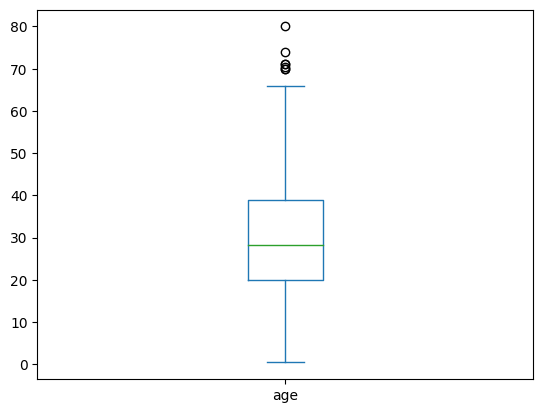

In [19]:
# 画出箱型图来查看age列中的异常值
import matplotlib.pyplot as plt

# your code


### 数值类数据处理

In [20]:
# 保留fare列中三位小数
# your code


0       7.250
1      71.283
2       7.925
3      53.100
4       8.050
        ...  
883    10.500
885    29.125
887    30.000
889    30.000
890     7.750
Name: fare, Length: 678, dtype: float64

In [21]:
# 将age列进行分箱操作并将结果存入age1列中，按0-20，20-60，60-100分为年少，壮年，年迈三类
# your code


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age1
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,壮年
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,壮年
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,壮年
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,壮年
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,壮年
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0,2,male,28.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True,壮年
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False,壮年
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,年少
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,壮年
